<a href="https://colab.research.google.com/github/WesleyVictors/python2/blob/main/DataModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. dataclass

Exercício adaptado de codechalleng.es/bites/154/ e codechalleng.es/bites/320/.

Neste desafio, você deve escrever uma dataclass chamada Bite que gerencia 3 atributos: number, title e level. Seus tipos são:

    number - int,
    title - str,
    level - classe Enum chamada BiteLevel com os atributos Beginner, Intermediate, Advanced.

Exemplo de dado: {'number': 154, 'title': 'Escreva uma dataclass', 'level': BiteLevel.Intermediate}

As características dessa classe são:

    O atributolevel tem um valor padrão BiteLevel.Beginner
    Uma coleção de objetos Bite tem que ser ordenável somente pelo atributo number
    Implemente o método especial __str__ para imprimir o Bite na forma f'{number} - {title} ({level})'

Teste sua classe executando o seguinte código:

bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

for b in bites.sort(): print(b)
# Ordem esperada na saída:
# 1 - Some n valores (Beginner)
# 37 - Reescreva um loop com recursão (Intermediate)
# 154 - Escreva uma dataclass (Intermediate)

In [2]:
from dataclasses import dataclass, field
from enum import Enum



class BiteLevel(Enum):
    Beginner = "Beginner"
    Intermediate = "Intermediate"
    Advanced = "Advanced"
@dataclass(order=True)
class Bite:
    number: int
    title: str
    level: BiteLevel = field(default=BiteLevel.Beginner, compare=False)

    def __post_init__(self):
        if isinstance(self.level, str):
            self.level = BiteLevel[self.level]

    def __str__(self):
        return f"{self.number} - {self.title} ({self.level.value})"

bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))


for b in sorted(bites):
    print(b)

1 - Some n valores (Beginner)
37 - Reescreva um loop com recursão (Intermediate)
154 - Escreva uma dataclass (Intermediate)


Q2. Pydantic

    Adaptada desse tutorial de Pydantic criado por Axel Donath e Nick Langellier.

Observe a seguinte lista de observações da previsão do tempo em Murmansk, Russia.

data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]

Escreva um script que calcule e imprima a temperatura média (em Celsius) em Murmansk para as datas fornecidas. Em seu script, você deve incluir um modelo Pydantic que registre com sucesso todos os elementos dados. Note que:

    Algumas amostras estão faltando dados. Você deve decidir quando o atributo pode ter um valor padrão ou quando definí-lo como opcional (typing.Optional).
    Você precisará implementar pelo menos um validador de campo para transformar atributos. Dica: teste primeiro quais vão falhar :)


In [6]:
from pydantic import BaseModel, validator
from typing import Optional, List
from datetime import datetime

class Clima(BaseModel):
    date: datetime
    temperature: float
    isCelsius: Optional[bool] = True
    airQualityIndex: int
    sunriseTime: Optional[str] = None
    sunsetTime: Optional[str] = None

    @validator('temperature', pre=True)
    def convert_temperature_to_float(cls, v):
        return float(v)

    @validator('isCelsius', pre=True, always=True)
    def parse_is_celsius(cls, v):
        if isinstance(v, str):
            return v.strip().lower() in ['true', '1', 'yes']
        return bool(v) if v is not None else True

    @validator('temperature', always=True)
    def convert_to_celsius(cls, temp, values):
        is_celsius = values.get('isCelsius', True)
        if not is_celsius:
            return (temp - 32) * 5/9  # Fahrenheit → Celsius
        return temp



data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]

# Validando e acumulando temperaturas em Celsius
temperaturas = []

for sample in data_samples:
    try:
        clima = Clima(**sample)
        temperaturas.append(clima.temperature)
    except Exception as e:
        print(f"Erro ao processar dado: {sample}\n{e}\n")

# Cálculo da média
if temperaturas:
    media = sum(temperaturas) / len(temperaturas)
    print(f"Temperatura média em Celsius: {media:.2f}°C")
else:
    print("Nenhum dado válido.")


Temperatura média em Celsius: 47.00°C


/tmp/ipython-input-6-3933378353.py:13: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  @validator('temperature', pre=True)
/tmp/ipython-input-6-3933378353.py:17: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  @validator('isCelsius', pre=True, always=True)
/tmp/ipython-input-6-3933378353.py:23: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validat

Q3

    Adaptada desse tutorial de Pydantic criado por Axel Donath e Nick Langellier.

Na célula a seguir, coletamos dados reais de uma das principais APIs de previsão do tempo, open-meteo. Não se preocupe em entender esse código, o mais importante é entender o resultado que ele retorna, ilustrado a seguir para uma coleta da temperatura dos últimos 15 dias em Itabira -MG. Caso deseje alterar a cidade de coleta, basta alimentar a latitude e longitude desejada, como nas opções a seguir.

    Itabira: 'latitude': -19.656655787605846, 'longitude': -43.228922960534476
    Bom Despacho: 'latitude': -19.726308457732443, 'longitude': -45.27462803349767

{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.01800060272216797,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2024-07-19T00:00",
      "2024-07-19T01:00",
      "2024-07-19T02:00",
      ...
    ],
    "temperature_2m": [
      21.9,
      20.9,
      20.0,
      ...
    ]
  }
}

Você deve escrever um modelo Pydantic OpenMeteo que receba diretamente a resposta dessa API, através do comando:

dados = OpenMeteo(**response)

Para comportar a estrutura hierárquica desse dicionário (é um dicionário com alguns dicionários internos), você deve criar uma classe Pydantic para cada dicionário interno (HourlyUnits e Hourly), com seus respectivos atributos. Essas classes serão atributos da classe principal OpenMeteo, que terá também os outros atributos da resposta (latitude, longitude, etc.).

In [43]:
from pydantic import BaseModel
from typing import List
import requests
from collections import defaultdict


class HourlyUnits(BaseModel):
    time: str
    temperature_2m: str

class Hourly(BaseModel):
    time: List[str]
    temperature_2m: List[float]

class OpenMeteo(BaseModel):
    latitude: float
    longitude: float
    generationtime_ms: float
    utc_offset_seconds: int
    timezone: str
    timezone_abbreviation: str
    elevation: float
    hourly_units: HourlyUnits
    hourly: Hourly


def main():
    url = 'https://api.open-meteo.com/v1/forecast'
    lat, long = -19.656655787605846, -43.228922960534476
    params = {
        'latitude': lat,
        'longitude': long,
        'elevation': 2,
        'hourly': 'temperature_2m',
        'forecast_days': 15
    }
    response = requests.get(url, params=params).json()


    dados = OpenMeteo(**response)

    #temperaturas/dia
    temp_por_dia = defaultdict(list)
    for t_str, temp in zip(dados.hourly.time, dados.hourly.temperature_2m):
        dia = t_str.split('T')[0]
        temp_por_dia[dia].append(temp)

    # média
    media_diaria = {dia: sum(temps) / len(temps) for dia, temps in temp_por_dia.items()}
    print("Histórico da média diária de temperatura (°C):")
    for dia in sorted(media_diaria):
        print(f"{dia}: {media_diaria[dia]:.2f} °C")

if __name__ == "__main__":
    main()


Histórico da média diária de temperatura (°C):
2025-06-25: 20.92 °C
2025-06-26: 21.06 °C
2025-06-27: 21.07 °C
2025-06-28: 21.15 °C
2025-06-29: 22.26 °C
2025-06-30: 22.43 °C
2025-07-01: 21.86 °C
2025-07-02: 21.66 °C
2025-07-03: 21.56 °C
2025-07-04: 21.05 °C
2025-07-05: 20.63 °C
2025-07-06: 20.99 °C
2025-07-07: 22.72 °C
2025-07-08: 20.87 °C
2025-07-09: 22.02 °C


Q4.

Com os dados carregados na questão anterior plote um gráfico de linha, com a biblioteca de sua preferência, onde o eixo x são os timestamps (data e hora) e o eixo y é a temperatura medida.

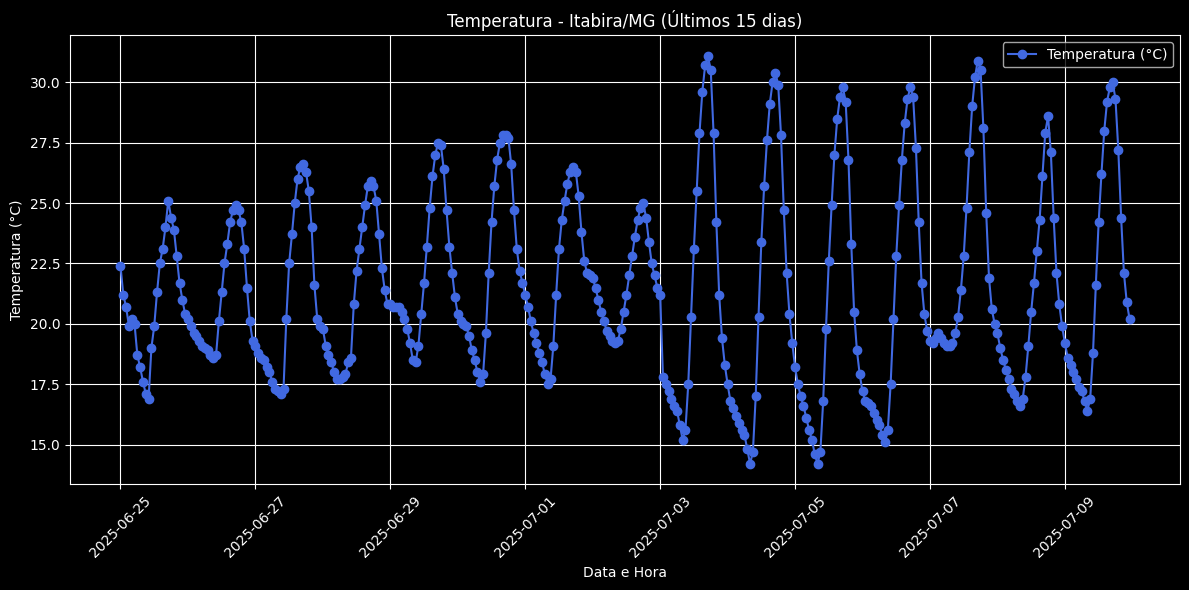

In [56]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


datas = [datetime.fromisoformat(t) for t in dados.hourly.time]
temperaturas = dados.hourly.temperature_2m


hoje = datetime.now()
limite = hoje - timedelta(days=15)

datas_filtradas = []
temperaturas_filtradas = []

for dt, temp in zip(datas, temperaturas):
    if dt >= limite:
        datas_filtradas.append(dt)
        temperaturas_filtradas.append(temp)


plt.figure(figsize=(12, 6))
plt.plot(datas_filtradas, temperaturas_filtradas, marker='o', linestyle='-', color='royalblue', label='Temperatura (°C)')
plt.style.use('dark_background')
plt.title('Temperatura - Itabira/MG (Últimos 15 dias)')
plt.xlabel('Data e Hora')
plt.ylabel('Temperatura (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()
